# XP Data Science - Semana 3 - Análise Exploratória

# Importando os dados

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from IPython.core.display import display, HTML
%matplotlib inline

- *%matplotlib inline* - Retorna os gráficos sem precisar chamar *plt.show()*

# Carregar os dados


In [142]:
df = pd.read_csv('winequality-white.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


- Dados separados por *;*
- Comando *head()* retorna os primeiros 5 linhas da tabela

# Explorando

In [144]:
df.shape

(4898, 12)

- Dataset possuie *4898* registro separados em *12* colunas

In [152]:
df.columns.values 

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [153]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [154]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


- Apenas dados inteiros ou decimais
- Nenhuma variável com data nulo

# Sumarizando os dados

In [103]:
df.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Observações Principais:
- Média é maior que a médiana (50%);
- Diferença nativamente grande no Q 75% e valores máximos dos preditores "residual sugar","free sulfur dioxide","total sulfur dioxide";
- Assim, as observações 1 e 2 sugerem que existem valores extremos - Outliers em nosso conjunto de dados

# Entendo o valor alvo

In [155]:
df.quality.unique() 

array([6, 5, 7, 8, 4, 3, 9])

- A variável alvo / variável dependente é de natureza discreta e categórica.
- a escala de pontuação "qualidade" varia de 1 a 10, sendo 1 ruim e 10 o melhor.
- 1,2 e 10 As classificações de qualidade não são dadas por nenhuma observação. Somente as pontuações obtidas estão entre 3 e 9.

In [156]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

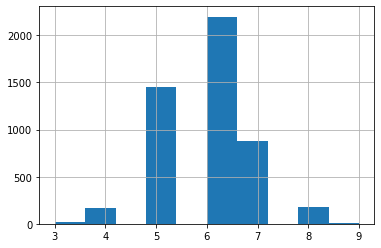

In [157]:
df.quality.hist()

- Isso nos diz a contagem de votos de cada índice de qualidade em ordem decrescente.
- "qualidade" tem a maioria dos valores concentrados nas categorias 5, 6 e 7.
- Apenas algumas observações feitas para as categorias 3 e 9

## Analisando algumas colunas

In [158]:
df["residual sugar"].describe()

count    4898.000000
mean        6.391415
std         5.072058
min         0.600000
25%         1.700000
50%         5.200000
75%         9.900000
max        65.800000
Name: residual sugar, dtype: float64

In [160]:
df[["residual sugar","pH"]].mean()

residual sugar    6.391415
pH                3.188267
dtype: float64

In [161]:
df_ph = df.copy()

- Criar um dataframe de cópia para as analises

In [162]:
df_ph["pH_mean"] = float(df_ph[["pH"]].mean())
df_ph.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,pH_mean
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,3.188267
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,3.188267
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,3.188267


In [163]:
df_ph["pH_minus_mean"] = df_ph["pH"] - df_ph["pH_mean"]
df_ph.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,pH_mean,pH_minus_mean
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,3.188267,-0.188267
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,3.188267,0.111733
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,3.188267,0.071733


In [164]:
df_ph["pH_minus_mean_sqtr"] = df_ph["pH_minus_mean"]**2
df_ph.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,pH_mean,pH_minus_mean,pH_minus_mean_sqtr
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,3.188267,-0.188267,0.035444
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,3.188267,0.111733,0.012484
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,3.188267,0.071733,0.005146


In [165]:
df_ph["pH_minus_mean_sqtr"].sum()

111.65738376888524

In [166]:
df_ph["pH_minus_mean"].count()

4898

In [167]:
(df_ph["pH_minus_mean_sqtr"].sum())/df_ph["pH_minus_mean"].count()

0.022796525881765055

In [168]:
round((df_ph["pH_minus_mean_sqtr"].sum()/df["pH"].count())**(1/2),6)

0.150985

In [189]:
a = ["pH","pH_minus_mean_sqtr","C"]
a[2]

'C'

In [197]:
df_ph["pH"].std()

0.1510005996150668

In [198]:
df_ph[["residual sugar","pH"]].std()

residual sugar    5.072058
pH                0.151001
dtype: float64

In [199]:
df_ph["residual sugar"].max()

65.8

In [200]:
df_ph[["residual sugar","pH"]].min()

residual sugar    0.60
pH                2.72
dtype: float64

In [201]:
df_ph[["residual sugar","pH"]].mode()

,residual sugar,pH
0,1.2,3.14


In [210]:
df["residual sugar"].value_counts().index[0]

1.2

In [209]:
df_ph.groupby('quality')[["residual sugar","pH"]].min()

,residual sugar,pH
quality,,
3,0.7,2.87
4,0.7,2.83
5,0.6,2.79
6,0.7,2.72
7,0.9,2.84
8,0.8,2.94
9,1.6,3.20


In [214]:
df_ph.groupby('quality')[["residual sugar","pH"]].agg(\
                                                      lambda x:\
                                                      x.value_counts()\
                                                      .index[0]
                                                      )

,residual sugar,pH
quality,,
3,4.6,3.24
4,1.2,3.16
5,1.2,3.14
6,1.2,3.24
7,1.4,3.15
8,2.1,2.94
9,1.6,3.28


In [215]:
pd.pivot_table(df,values=["residual sugar","pH"],\
               index="quality",\
               aggfunc=[\
                        "mean",\
                        "std",\
                        lambda x:x.value_counts().index[0]\
                       ]\
              )

mean                      std                <lambda>  \
               pH residual sugar        pH residual sugar       pH   
quality                                                              
3        3.187500       6.392500  0.209834       5.317332     3.24   
4        3.182883       4.628221  0.163691       4.163610     3.16   
5        3.168833       7.334969  0.140895       5.327619     3.14   
6        3.188599       6.441606  0.150996       5.166625     3.24   
7        3.213898       5.186477  0.158402       4.297989     3.15   
8        3.218686       5.671429  0.152289       4.263391     2.94   
9        3.308000       4.120000  0.082885       3.759255     3.28   

                        
        residual sugar  
quality                 
3                  4.6  
4                  1.2  
5                  1.2  
6                  1.2  
7                  1.4  
8                  2.1  
9                  1.6

# Verificando a assimetria

In [216]:
df["pH"].kurtosis()

0.5307749515326159

In [218]:
df["pH"].skew()

0.15579639772222578

- Funções prontas para cálculo

In [129]:
def make_hist(df,col,title):
    df_plot = df.copy()
    fig, ax = plt.subplots(figsize=(10,5))
    
    print("Assimetria {}".format(df[col].skew()))       
    print("Curtose {}".format(df[col].kurtosis()))
          
    df_plot[col].plot.kde(ax=ax, legend=False, title=title)
    df_plot[col].plot.hist(density=True, ax=ax)
    
          
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y')
    ax.set_facecolor('#d8dcd6')
    plt.show()

In [219]:
l = df.columns.values
l

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

Assimetria 0.6477514746297539
Curtose 2.1721784645585807


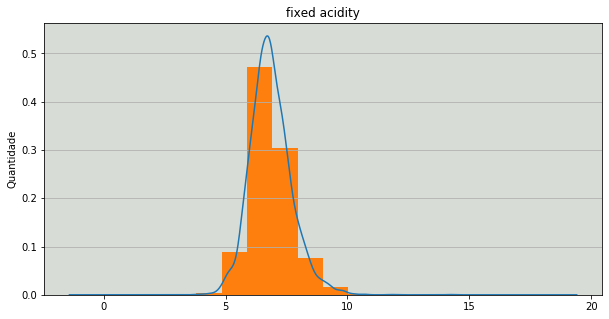

Assimetria 1.5769795029952025
Curtose 5.091625816866611


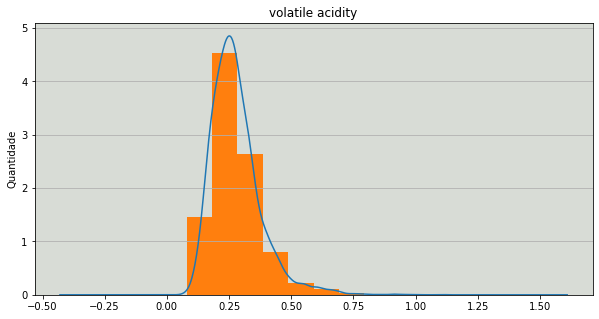

Assimetria 1.2819203981671066
Curtose 6.174900656983394


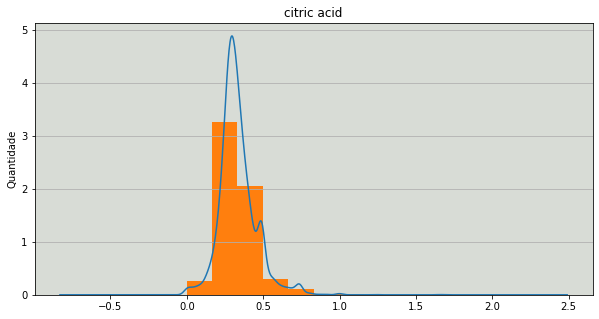

Assimetria 1.0770937564240868
Curtose 3.4698201025634265


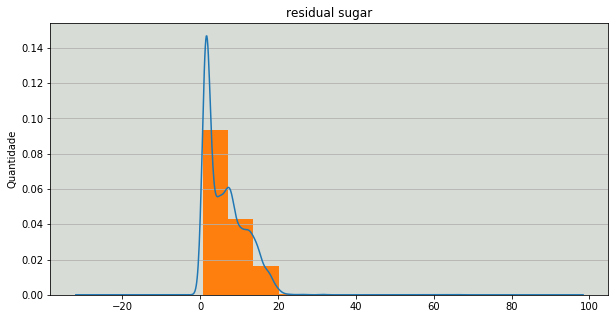

Assimetria 5.023330682759707
Curtose 37.564599706679516


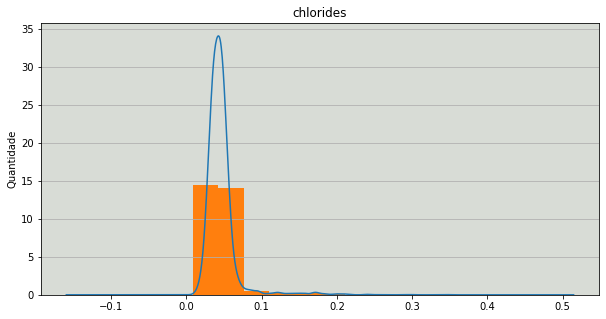

Assimetria 1.4067449205303078
Curtose 11.466342426607905


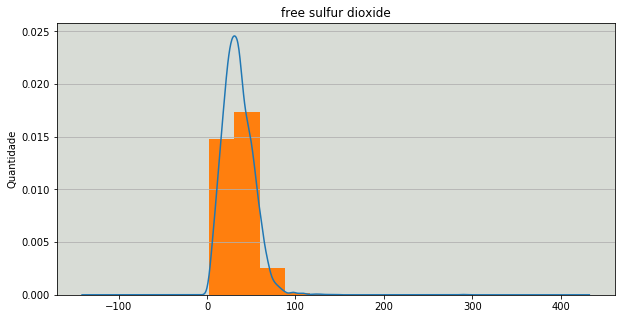

Assimetria 0.3907098416536745
Curtose 0.5718532333534614


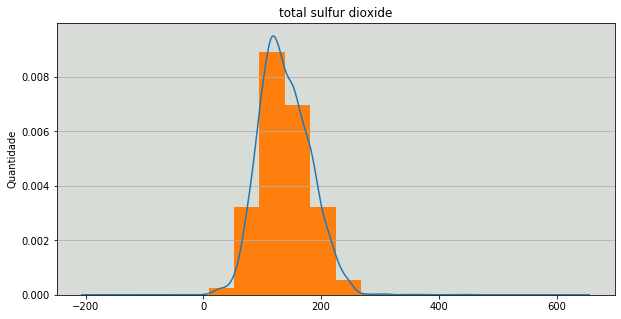

Assimetria 0.9777730048689881
Curtose 9.793806910765209


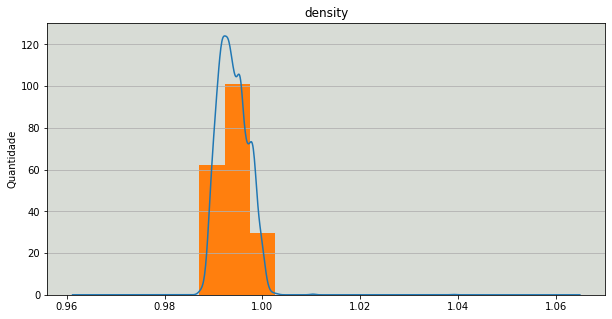

Assimetria 0.4577825459180807
Curtose 0.5307749515326159


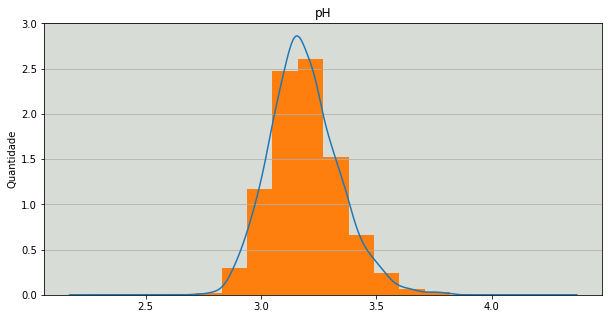

Assimetria 0.9771936833065663
Curtose 1.5909296303516225


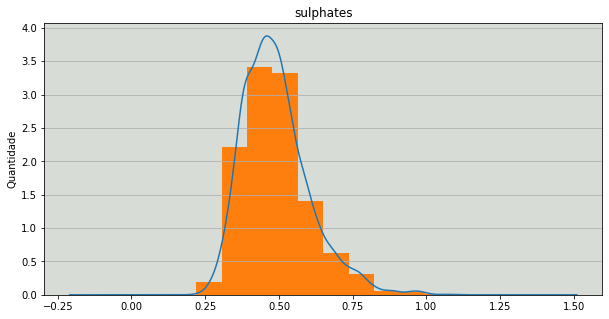

Assimetria 0.4873419932161276
Curtose -0.6984253277895518


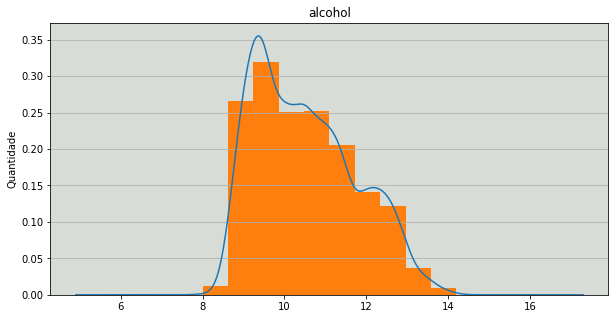

Assimetria 0.15579639772222578
Curtose 0.21652582721530989


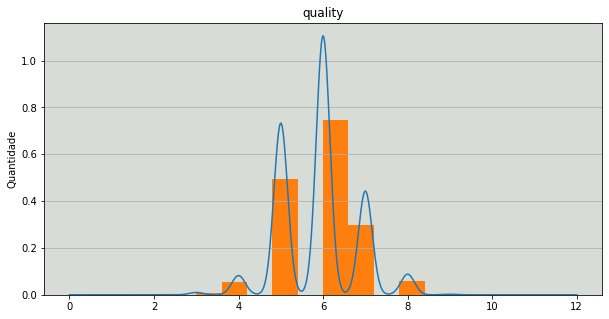

In [221]:
for i in l:
    make_hist(df,i,i)

- A coluna "pH" parece estar normalmente distribuída
- restantes todas as variáveis independentes estão inclinadas à direita / inclinadas positivamente.